In [181]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Let's take a quick look at the data

In [182]:
calendar = pd.read_csv('dataset/calendar.csv', parse_dates=['date'])
listings = pd.read_csv('dataset/listings.csv')
reviews = pd.read_csv('dataset/reviews.csv')

In [183]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [184]:
print("Number of rows: ", calendar.shape[0])
print(min(calendar['date']))
print(max(calendar['date']))
calendar.info()

Number of rows:  1393570
2016-01-04 00:00:00
2017-01-02 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


As we can see, there are nearly 1.4 million rows in this file and they indicate the availability status and price of rooms from January 4th, 2016 till the end of year. 

In [185]:
listings.shape

(3818, 92)

In [186]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


This is a larger file which decribes in detail all the information of each room (more than 90 attributes are shown) and average review score at the last column.

In [187]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [188]:
reviews.shape

(84849, 6)

This file displays all the comments gave to a particular room by reviewers.

# Business Understanding

From the information above, we can take into consideration a few questions that can be clarified by analyzing this dataset:
1. What are the busiest times of the year to visit Seattle?
2. How did this trend correlate to booking price?
3. Is there anything else that also affects the booking price?

# Data Preparation

In [189]:
# Remove character '$' and ',' from price column and convert it to float datatype
calendar['price'] = calendar['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
calendar['price'] = calendar['price'].astype('float32')
calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,85.0


In [190]:
# Fill missing price value with value from row above (to get value of nearest date,
#  noted that data is sored by listing_id and date )
calendar['price'] = calendar['price'].fillna(method='ffill')
calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
5,241032,2016-01-09,f,85.0
6,241032,2016-01-10,f,85.0
7,241032,2016-01-11,f,85.0
8,241032,2016-01-12,f,85.0
9,241032,2016-01-13,t,85.0


In [191]:
# Remove character '$' and ',' from price column and convert it to float datatype
listings['price'] = listings['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
listings['price'] = listings['price'].astype('float32')

# Data Modeling and Evaluation

## 1. What are the busiest times of the year to visit Seattle?

In [192]:
df1 = calendar.copy()
# Convert categorical variables (available column) to [0,1] encodings, 1 for occupied rooms
df1['available'] = [1 if i=='f' else 0 for i in df1.iloc[:,2]]

# Get month from date
df1['month'] = [i.month for i in df1.iloc[:,1]]
df1

,listing_id,date,available,price,month
0,241032,2016-01-04,0,85.0,1
1,241032,2016-01-05,0,85.0,1
2,241032,2016-01-06,1,85.0,1
3,241032,2016-01-07,1,85.0,1
4,241032,2016-01-08,1,85.0,1
...,...,...,...,...,...
1393565,10208623,2016-12-29,1,87.0,12
1393566,10208623,2016-12-30,1,87.0,12
1393567,10208623,2016-12-31,1,87.0,12
1393568,10208623,2017-01-01,1,87.0,1


In [193]:
# Calculate mean value for each month
booked_by_month = df1.groupby('month').agg(bookings=('available', 'mean'))

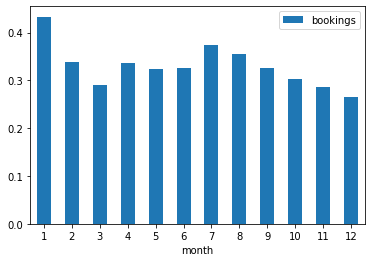

In [194]:
# Visulize the result
ax = booked_by_month.plot.bar(rot=0)

Based on the number of availability rates, Seatle seemed to be most crowded in January and July. 
Let's see by how much do prices changed in these times.

## 2.  How did this trend correlate to booking price?

In [195]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0


In [196]:

df2 = calendar.copy()
df2['month'] = df2.apply(lambda row: row.date.month, axis=1)
df2['month'] = [i.month for i in df2.iloc[:,1]]
price_by_month = df2.groupby('month').agg(avg_price=('price', 'mean'))
price_by_month

,avg_price
month,
1,124.882469
2,125.573257
3,129.262329
4,132.020874
5,135.729706
6,143.023361
7,145.779846
8,145.363754
9,140.847107


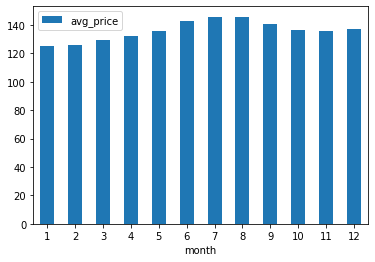

In [197]:
# Visulize the result
ax = price_by_month.plot.bar(rot=0)

There was a slight variation in the price with respect to the month. However, we can notice that the price was highest in the middle of the year, from June to August.

January, February and March were months where the price rates were the lowest, specially in January. That is the reason why most of the listings were occupied in January. Visitors relatively less preferred February and March because the prices started increasing again.

On the other hand, most of tourists came to Seattle in summer when the weather was warm and comfortable. Most hotels would be fully booked so people would willing to pay a higher amount of money to find a place to stay.

##  3. Is there anything else that also affects the booking price?

In [198]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [199]:
# Choose some columns that can affect the price
cols = ['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'guests_included','review_scores_rating','price']
df = listings[cols]

In [200]:
df.shape

(3818, 12)

In [201]:
df.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,review_scores_rating,price
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,2,95.0,85.0
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,96.0,150.0
2,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10,97.0,975.0
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,NaN,100.0
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,6,92.0,450.0


In [202]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,review_scores_rating,price
count,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3171.000000,3818.000000
mean,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,94.539262,127.976166
std,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,6.606083,90.250023
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,93.000000,75.000000
50%,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,96.000000,100.000000
75%,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,99.000000,150.000000
max,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,100.000000,1000.000000


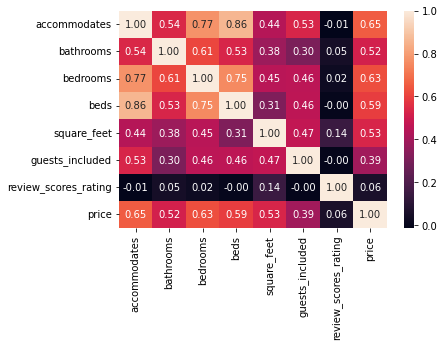

In [203]:
# Display a correlation matrix of all the quantitive variables 
sns.heatmap(df.corr(), annot=True, fmt='.2f');

Here we can see that some variables have a higher correlation with the price like accommodates, bathrooms, bedrooms, beds, square_feet.
Let's consider other non-quantitive factors.

In [204]:
def cal_avg_price(df, col):
    return df.groupby(col).agg(avg_price=('price', 'mean')).sort_values(by=['avg_price'], ascending=False)

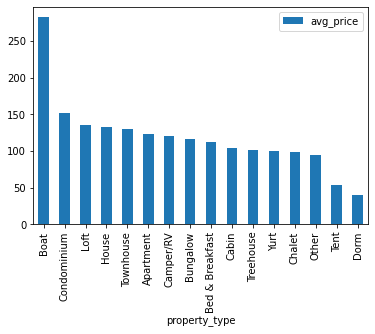

In [205]:
# Property type
cal_avg_price(df, 'property_type').plot.bar();

Boat is the most luxurious type of accommodation and its price doubles of many other kinds.  Whereas, tent and dorm are much cheaper, approximately $50 on average.

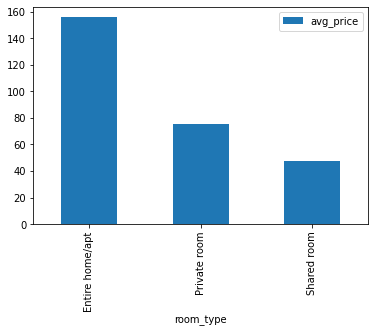

In [206]:
# Room type
cal_avg_price(df, 'room_type').plot.bar();

Obviously, renting entire room or apartment is more expensive than renting a private or shared room.

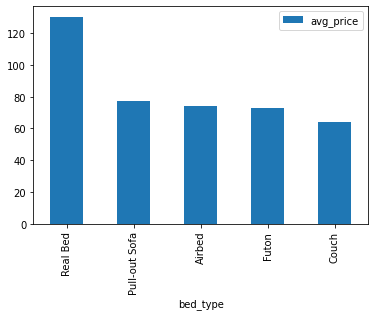

In [207]:
#  Bed type
cal_avg_price(df, 'bed_type').plot.bar();

Sleeping on other kinds except a real bed will save a lot of money!

In [208]:
# Amenities
from collections import defaultdict

def get_all_amenities(df):
    all_vals = df['amenities'].unique()
    result = []
    for val in all_vals:
        amens =  val.split(',')
        for amen in amens:
            amen = amen.replace('"', '').replace('{','').replace('}','')
            if amen not in result:
                result.append(amen)
    return result

def total_count(df, col_name, col_mean, look_for):
    new_df = defaultdict(int)
    denorms = dict()
    for val in look_for:
        denorms[val] = 0
        for idx in range(df.shape[0]):
            if df[col_name].isnull()[idx] == False:
                if val in df[col_name][idx] and df[col_mean][idx] > 0:
                    new_df[val] += df[col_mean][idx]
                    denorms[val] += 1
    # Turn into dataframe
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    denorms =  pd.DataFrame(pd.Series(denorms)).reset_index()

    # Change the column names
    new_df.columns = [col_name, 'col_sum']
    denorms.columns = [col_name, 'col_total']

    # Merge dataframe
    df_all = pd.merge(new_df, denorms)
    df_all['mean_col'] = df_all['col_sum']/df_all['col_total']
    # new_df.sort_values('count', ascending=False, inplace=True)
    return df_all


In [209]:
# Clean and count the number of each amenity
possible_amens = get_all_amenities(df)

# How price was related to each of these amenities
df_all = total_count(df, 'amenities', 'price', possible_amens)

In [232]:
df_all.sort_values(by='mean_col', ascending=False, inplace=True)
df_all

,amenities,col_sum,col_total,mean_col
40,Doorman,17022.0,85,200.258824
37,Pool,27172.0,159,170.893082
22,Hot Tub,50610.0,303,167.029703
31,Suitable for Events,33560.0,209,160.574163
35,Gym,69105.0,442,156.346154
1,Cable TV,224713.0,1446,155.403181
4,Air Conditioning,103782.0,677,153.296898
23,Indoor Fireplace,134980.0,886,152.347630
7,Family/Kid Friendly,295971.0,1963,150.774834
18,Pets Allowed,69500.0,472,147.245763


You will have to pay more to book a place that provides modern facilities (pool, hot tub, cable TV, air-conditioning, indoor fireplace...) or services (doorman, events, gym, pets allowed...)

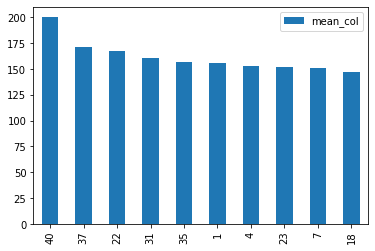

In [233]:

df_all[['amenities', 'mean_col']].iloc[0:10,:].plot.bar();

In [211]:
# GET_PASSES_THIS_REPO_UDACITY_PLEASE

In [213]:
# The results of this analysis were written in my Medium blog here:
# https://medium.com/@ngdung28996/a-sneak-peek-into-the-airbnb-activity-in-seattle-bce201672776